In [1]:
import ete3
from Bio import Phylo
from io import StringIO
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open('/data3/wangkun/mtsim_res/res_1113/linear_/292542/linear_tree_gt_292542.nwk', 'r') as f:
    tree_file = f.readlines()

In [127]:
tree = Phylo.read(StringIO(tree_file[0]), format='newick')
leave = tree.get_terminals()
sel_cells = [leave[i].name for i in np.random.choice(range(len(tree.get_terminals())), 500, replace=False)]

tr = ete3.Tree(tree_file[0].replace('\n', ';'), format=3)
tr.prune(sel_cells)
tree = Phylo.read(StringIO(tr.write()), format='newick')
for i in tree.get_nonterminals():
    i.branch_length = 1
for i in tree.get_terminals():
    i.branch_length = 50
    
Phylo.write(tree, './tree_50', format='newick')
for i in tree.get_terminals():
    i.branch_length = 800
Phylo.write(tree, './tree_800', format='newick')

1

In [128]:
data=pd.read_csv(StringIO(tree_file[1].replace('\t', '\n')), sep=':', header=None, index_col=0)

In [129]:
data = data.loc[[i.name for i in tree.get_terminals()]]

In [130]:
color_tab = {0:'#31a354', 1:'#a7a2ce', 2:'#74aad4', 3:'#fdd0a2', 4:'#c6dbef'}

In [131]:
head = 'DATASET_COLORSTRIP\nSEPARATOR SPACE\nDATASET_LABEL label1\nCOLOR #ff0000\nDATA\n'
with open('./color_anno.txt', 'w') as f:
    f.write(head)
    for i in data.index:
        f.write(f'{i} {color_tab[data.loc[i][1]]}\n')



In [4]:
import pickle

In [5]:
from tqdm import tqdm

In [6]:
import os

In [45]:
mts = pickle.load(open('/data3/wangkun/mtsim_res/res_1113/linear_/630531/mt_allmuts_mid_0.1_630531_50.pkl', 'rb'))

In [46]:
mf = mut_freq(mts)

  1%|          | 31/5000 [00:00<00:16, 308.75it/s]/tmp/ipykernel_88349/3739064826.py:13: RuntimeWarning: invalid value encountered in divide
  mut_freqs.append(mut_pos.sum(0)/len(mt_muts[cell]))
100%|██████████| 5000/5000 [00:19<00:00, 257.32it/s]


In [60]:
mf.loc[['<23_3555>',
'<23_2618>',
'<20_3017>']]

,0,1,2,3,4,5,6,7,8,9,...,6721,6740,6741,6753,6755,6761,6777,6788,6791,6793
<23_3555>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
<23_2618>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
<20_3017>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [205]:
mts1 = pickle.load(open('/data3/wangkun/mtsim_res/res_1113/linear_const/123986/mt_allmuts_const_0.1_123986.pkl', 'rb'))

In [37]:
vafs = []
for i in tqdm(os.listdir('/data3/wangkun/mtsim_res/res_1113/linear_const/')):
    if i == 'rm':
        continue
    if i== 'old':
        continue
    mts = pickle.load(open(f'/data3/wangkun/mtsim_res/res_1113/linear_const/{i}/mt_allmuts_const_0.1_{i}.pkl', 'rb'))
    vafs.append(mut_freq(mts, sel_cells=['<0_0>']).to_numpy())


100%|██████████| 22/22 [07:03<00:00, 19.27s/it]


In [13]:
vafs_ = []
for i in tqdm(os.listdir('/data3/wangkun/mtsim_res/res_1113/linear_/')):
    if i == 'rm':
        continue
    mts = pickle.load(open(f'/data3/wangkun/mtsim_res/res_1113/linear_/{i}/mt_allmuts_mid_0.1_{i}.pkl', 'rb'))
    vafs_.append(mut_freq(mts, sel_cells=['<0_0>']).to_numpy())


100%|██████████| 21/21 [02:16<00:00,  6.49s/it]


In [38]:
vafs = [i.flatten() for i in vafs]
vafs_ = [i.flatten() for i in vafs_]

(array([6., 1., 4., 3., 3., 1., 1., 0., 0., 1.]),
 array([0.016 , 0.1144, 0.2128, 0.3112, 0.4096, 0.508 , 0.6064, 0.7048,
        0.8032, 0.9016, 1.    ]),
 <BarContainer object of 10 artists>)

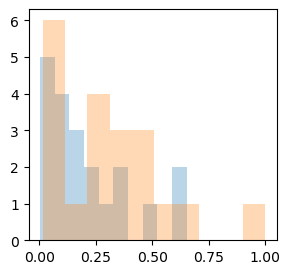

In [39]:
fig, ax = plt.subplots(figsize=(3.2,3))
ax.hist([i[0] for i in vafs], alpha=0.3)
ax.hist([i[0] for i in vafs_], alpha=0.3)

In [34]:
vafs_bif = [i.flatten() for i in vafs_bif]
vafs_bif_ = [i.flatten() for i in vafs_bif_]

(array([4., 6., 6., 2., 0., 0., 1., 1., 0., 1.]),
 array([0.008 , 0.0884, 0.1688, 0.2492, 0.3296, 0.41  , 0.4904, 0.5708,
        0.6512, 0.7316, 0.812 ]),
 <BarContainer object of 10 artists>)

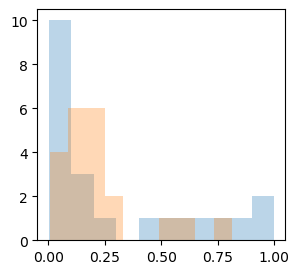

In [35]:
fig, ax = plt.subplots(figsize=(3.2,3))
ax.hist([i[0] for i in vafs_bif], alpha=0.3)
ax.hist([i[0] for i in vafs_bif_], alpha=0.3)

In [40]:
mts_new_const = pickle.load(open(f'/data3/wangkun/mtsim_res/res_1113/linear_const/519886/mt_allmuts_const_0.1_519886_50.pkl', 'rb'))

In [42]:
mf = mut_freq(mts_new_const)

100%|██████████| 5000/5000 [06:27<00:00, 12.90it/s]


In [44]:
mf.max()

0        0.547032
1        0.321930
2        0.233871
3        0.307929
4        0.280272
           ...   
34494    0.055481
34498    0.008598
34501    0.002149
34504    0.006270
34518    0.002247
Length: 5298, dtype: float64

In [41]:
help(mut_freq)

Help on function mut_freq in module __main__:

mut_freq(mt_muts, max_mut_id=None, sel_cells=None)



In [28]:
vafs_bif = []
for i in tqdm(os.listdir('/data3/wangkun/mtsim_res/res_1113/bifurcated_const/')):
    if i == 'rm':
        continue
    mts = pickle.load(open(f'/data3/wangkun/mtsim_res/res_1113/bifurcated_const/{i}/mt_allmuts_const_0.1_{i}.pkl', 'rb'))
    vafs_bif.append(mut_freq(mts, sel_cells=['<0_0>']).to_numpy())


100%|██████████| 21/21 [14:30<00:00, 41.43s/it]


In [29]:
vafs_bif_ = []
for i in tqdm(os.listdir('/data3/wangkun/mtsim_res/res_1113/bifurcated_/')):
    if i == 'rm':
        continue
    mts = pickle.load(open(f'/data3/wangkun/mtsim_res/res_1113/bifurcated_/{i}/mt_allmuts_mid_0.1_{i}.pkl', 'rb'))
    vafs_bif_.append(mut_freq(mts, sel_cells=['<0_0>']).to_numpy())


100%|██████████| 21/21 [02:02<00:00,  5.83s/it]


In [204]:
mut_freq(mts1, sel_cells=['<0_0>']).to_numpy()

100%|██████████| 1/1 [00:00<00:00, 586.53it/s]


array([[0.396, 0.086, 0.044, 0.022, 0.01 , 0.108, 0.006, 0.002, 0.002,
        0.002, 0.034, 0.016, 0.016, 0.032, 0.002, 0.026, 0.006, 0.002,
        0.014, 0.002, 0.016, 0.002, 0.006, 0.03 , 0.006, 0.004, 0.004,
        0.026, 0.002, 0.002, 0.012, 0.016, 0.006, 0.002, 0.006, 0.002,
        0.002, 0.016, 0.004, 0.004, 0.002, 0.012, 0.002, 0.012, 0.018,
        0.002, 0.002, 0.006, 0.004, 0.004, 0.004, 0.008, 0.008, 0.004,
        0.002, 0.002, 0.002, 0.01 , 0.01 , 0.006, 0.002, 0.002, 0.006,
        0.002, 0.008, 0.004, 0.002, 0.002, 0.002, 0.008, 0.006, 0.002,
        0.002, 0.004, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.004,
        0.006, 0.002, 0.004, 0.002, 0.002, 0.004, 0.002, 0.002, 0.002,
        0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002,
        0.002, 0.004, 0.004, 0.004, 0.002, 0.002, 0.002, 0.002, 0.002,
        0.002, 0.002, 0.002, 0.002, 0.002]])

In [202]:
mut_freq(mts1, sel_cells=['<0_0>']).to_numpy()

100%|██████████| 1/1 [00:00<00:00, 244.74it/s]


array([[0.122, 0.196, 0.006, 0.026, 0.006, 0.048, 0.004, 0.004, 0.002,
        0.012, 0.012, 0.024, 0.012, 0.016, 0.002, 0.01 , 0.016, 0.012,
        0.004, 0.002, 0.006, 0.008, 0.022, 0.012, 0.004, 0.014, 0.016,
        0.004, 0.002, 0.002, 0.002, 0.004, 0.002, 0.002, 0.002, 0.006,
        0.004, 0.002, 0.002, 0.002, 0.004, 0.002, 0.004, 0.004, 0.006,
        0.006, 0.002, 0.004, 0.002, 0.004, 0.002, 0.006, 0.002, 0.002,
        0.002, 0.002, 0.008, 0.002, 0.006, 0.002, 0.002, 0.002, 0.002,
        0.002, 0.002, 0.006, 0.004, 0.006, 0.002, 0.002, 0.002, 0.002,
        0.004, 0.002, 0.002, 0.002, 0.002, 0.002, 0.004, 0.002, 0.002,
        0.002, 0.002, 0.002, 0.002, 0.002, 0.004, 0.002, 0.002, 0.002,
        0.004, 0.002, 0.002, 0.004, 0.002, 0.002, 0.002]])

In [11]:
def mut_freq(mt_muts, max_mut_id = None, sel_cells=None):
    if sel_cells is None:
        sel_cells = list(mt_muts.keys())
    if not max_mut_id:
        max_mut_id = max([max([max(list(i)+[0]) for i in mt_muts[j]]+[0]) for j in sel_cells])
    max_mut_id += 1
    mut_freqs = []
    cell_names = []
    for cell in tqdm(sel_cells):
        mut_pos = np.zeros((len(mt_muts[cell]), max_mut_id))
        for ind, mt in enumerate(mt_muts[cell]):
            mut_pos[ind][list(mt)] = 1
        mut_freqs.append(mut_pos.sum(0)/len(mt_muts[cell]))
        cell_names.append(cell)
    mf = pd.DataFrame(mut_freqs, index=cell_names)
    mf = mf[mf.columns[mf.sum()>0]]
    return mf

In [197]:
mf1 = pd.read_csv('/data3/wangkun/mtsim_res/res_1113/linear_const/247766/mt_mut_freq_const_0.1_247766.csv', index_col=0)

(array([54., 34.,  8.,  1.,  0.,  0.,  0.,  1.,  0.,  2.]),
 array([0.03366337, 0.08870571, 0.14374805, 0.1987904 , 0.25383274,
        0.30887508, 0.36391743, 0.41895977, 0.47400211, 0.52904446,
        0.5840868 ]),
 <BarContainer object of 10 artists>)

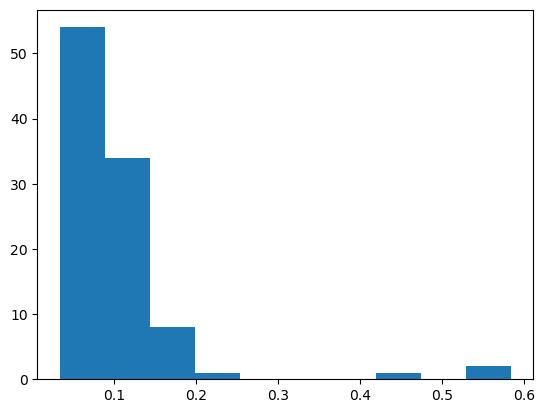

In [198]:
plt.hist(mf1.max()[:100])

In [188]:
mf2 = pd.read_csv('/data3/wangkun/mtsim_res/res_1113/bifurcated_const/18142/mt_mut_freq_const_0.1_18142.csv', index_col=0)

(array([23., 49., 18.,  7.,  0.,  0.,  1.,  0.,  1.,  1.]),
 array([0.03018868, 0.06449039, 0.09879209, 0.1330938 , 0.1673955 ,
        0.20169721, 0.23599892, 0.27030062, 0.30460233, 0.33890404,
        0.37320574]),
 <BarContainer object of 10 artists>)

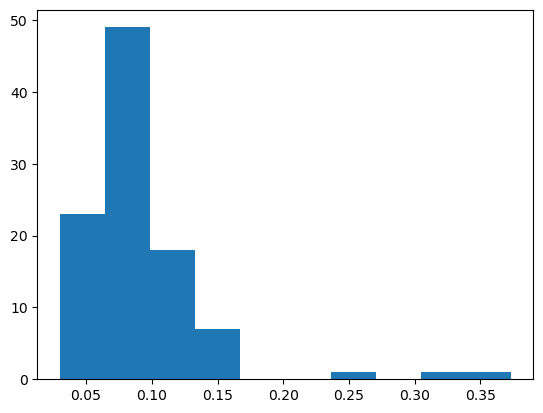

In [187]:
plt.hist(mf1.max()[:100])

In [140]:
mf = mut_freq(mts)

100%|██████████| 5000/5000 [08:21<00:00,  9.97it/s]


In [150]:
mf

,0,1,2,3,4,5,7,8,9,10,...,33918,33928,33937,33944,33945,33947,33948,33969,33974,33983
<12_956>,0.051357,0.342627,0.000000,0.022010,0.000000,0.024945,0.000000,0.000000,0.0,0.013206,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
<11_881>,0.156489,0.256997,0.006361,0.066794,0.000000,0.047074,0.000000,0.000000,0.0,0.006997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
<20_4220>,0.103448,0.354970,0.000000,0.031778,0.000000,0.105477,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
<20_5243>,0.079777,0.266543,0.000000,0.035250,0.000000,0.051330,0.000000,0.000000,0.0,0.031540,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
<17_4456>,0.132440,0.230563,0.024665,0.018231,0.000000,0.089008,0.000000,0.000000,0.0,0.015013,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
<17_4792>,0.095124,0.186251,0.040767,0.000000,0.026379,0.000000,0.022382,0.058353,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017586
<11_980>,0.088871,0.137710,0.029624,0.000000,0.000000,0.075260,0.000000,0.000000,0.0,0.098479,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
<8_201>,0.236531,0.162943,0.031537,0.018397,0.001314,0.032852,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
<11_999>,0.159325,0.314902,0.041237,0.037488,0.044986,0.041237,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [147]:
import matplotlib.pyplot as plt

(array([ 1., 28., 47.,  9., 10.,  1.,  2.,  0.,  1.,  1.]),
 array([0.02008521, 0.07125292, 0.12242063, 0.17358834, 0.22475604,
        0.27592375, 0.32709146, 0.37825917, 0.42942688, 0.48059459,
        0.5317623 ]),
 <BarContainer object of 10 artists>)

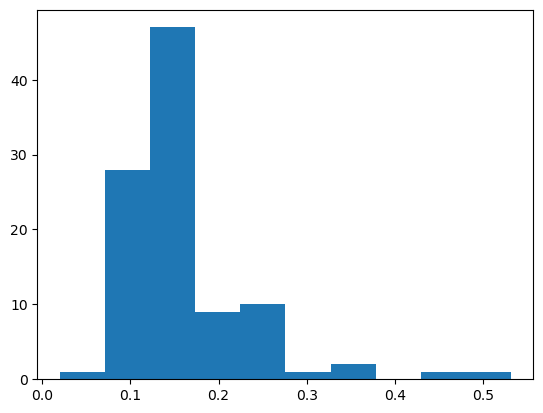

In [149]:
plt.hist(mf.max()[:100])